### 工作進度  
* 【置頂】**新的筆記內容架構**與**量化技術分析系統**相關資訊請參閱[250801筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/250801%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。    
* 本日「K線追擊週報」LINE群組資訊：[楊忠憲K線追擊週報_250820日報.docx](https://mega.nz/file/ntQ0gawL#3MolwCP60g6Ok2qRPFPKHF64JNV44XbwyQCD1jiwGHI)。

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
import base64
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-08-20 21:46:53.902 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 6682：股票名稱 ＝ 華旭先進，產業類別 ＝ 光電業，類型 ＝ emerging
##### 更新技術分析資料 #####


2025-08-20 21:47:21.771 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-20 21:47:26.880 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-20 21:47:56.310 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-20 21:48:01.466 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-20 21:48:32.262 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-20 21:48:37.462 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-20 21:49:09.004 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-20 21:49:16.195 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-08-20 21:49:31.342 | INFO     | FinMind.data.finmind_api:get_data:155 - download Ta

日K：2025-08-20


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> 盤前：[K線捕手](https://www.facebook.com/kevinyang20180801)｜[8/20盤前快訊](https://www.facebook.com/kevinyang20180801/posts/pfbid0dH7W3yw2gME7S6qhh49Wjsm5eF1LQc19v2dQXcKbHubu5eKzSwhaqN2yZq86xXikl)
> 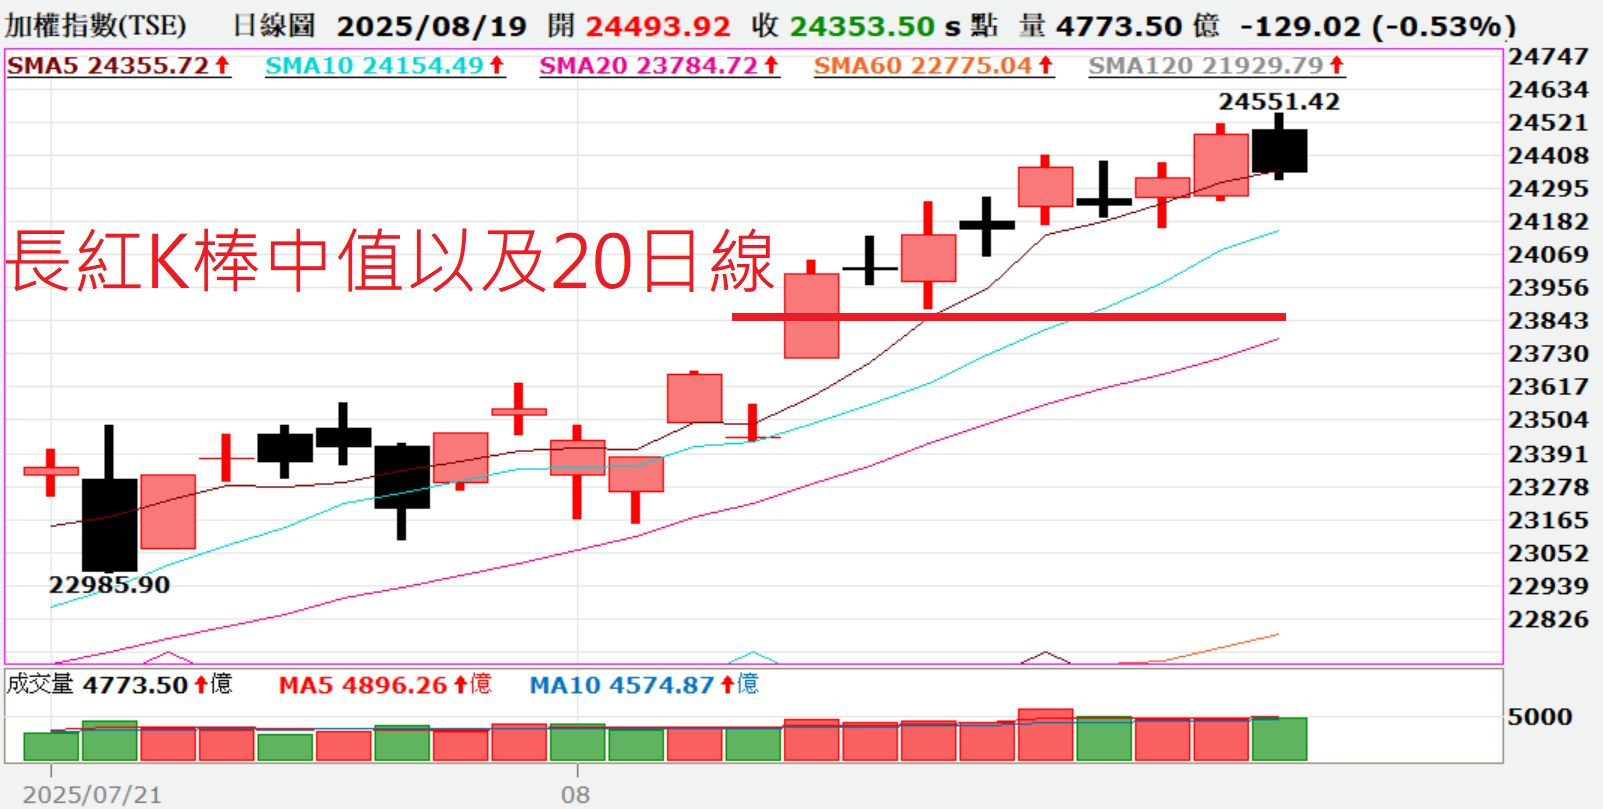  

In [5]:
# 支撐線
def line_drawing_callback( range_prices) :

    seq_of_seq_of_points = []
    linewidths           = []
    colors               = []
    
    # 設定支撐線
    support_line_start_date  = '2025-08-06'
    support_line_end_date    = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price       = range_prices.loc['2025-08-07']['Low'] + ((range_prices.loc['2025-08-07']['High'] - range_prices.loc['2025-08-07']['Low']) / 2)
    seq_of_seq_of_points.append([(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)])
    linewidths.append(1.0)
    colors.append('xkcd:red')
    
    return seq_of_seq_of_points,linewidths,colors

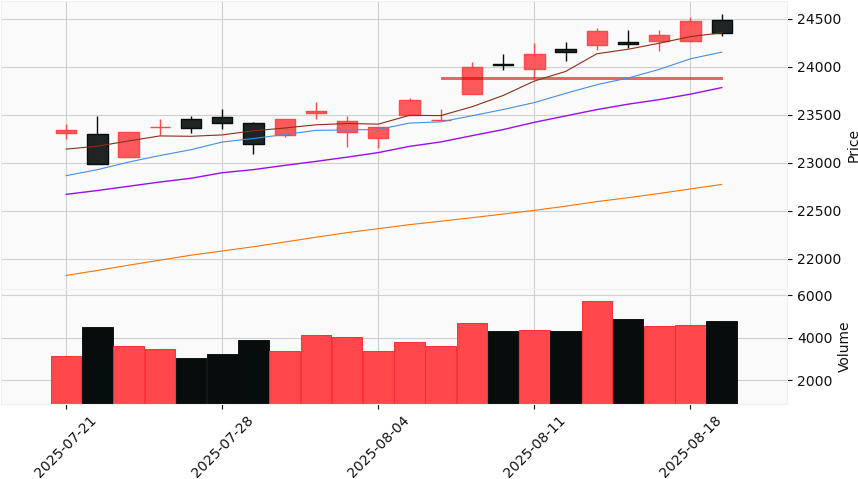

In [6]:
# 開盤：支撐線繪製
image = mysys.DrawOnKlineChart('TAIEX','2025-07-21','2025-08-19',line_drawing_callback)
display(image)

> **盤中**  
> 昨天小跌、今天大跌，投資一定會又開始恐慌，不過短線修正到這邊，是複合支撐，支撐力道會比較強，應該不至於連續性急跌，短線應該會整理一下，之後新的方向才會再出來。  
> 但這是指數，個別股如果技術面破壞，籌碼也轉弱，那可能有人出貨了，所以走勢不一定同步，要自行判斷囉！
> 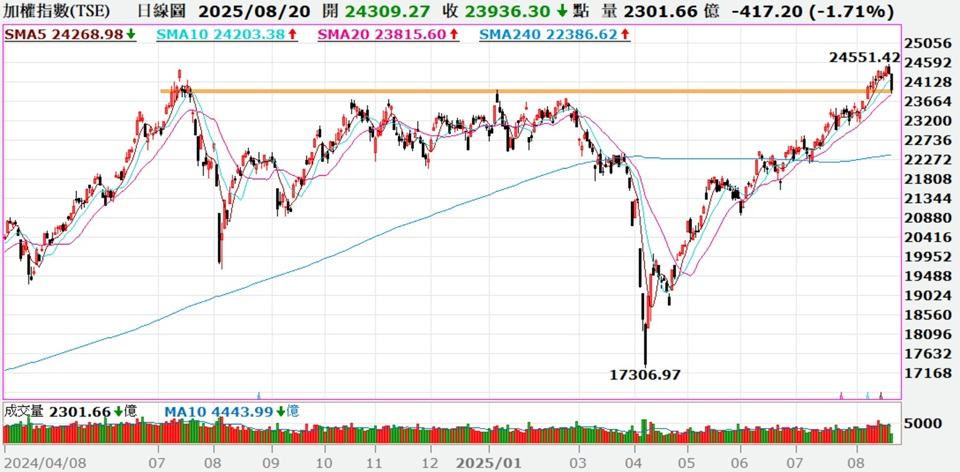  

In [7]:
# 支撐線
def line_drawing_callback( range_prices) :

    seq_of_seq_of_points = []
    linewidths           = []
    colors               = []
    
    # 設定支撐線
    support_line_start_date  = '2024-07-04'
    support_line_end_date    = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price       = range_prices.loc['2025-01-07']['Open'] + ((range_prices.loc['2025-01-07']['High'] - range_prices.loc['2025-01-07']['Open'])/2)
    seq_of_seq_of_points.append([(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)])
    linewidths.append(1.5)
    colors.append('xkcd:yellow orange')
    
    return seq_of_seq_of_points,linewidths,colors

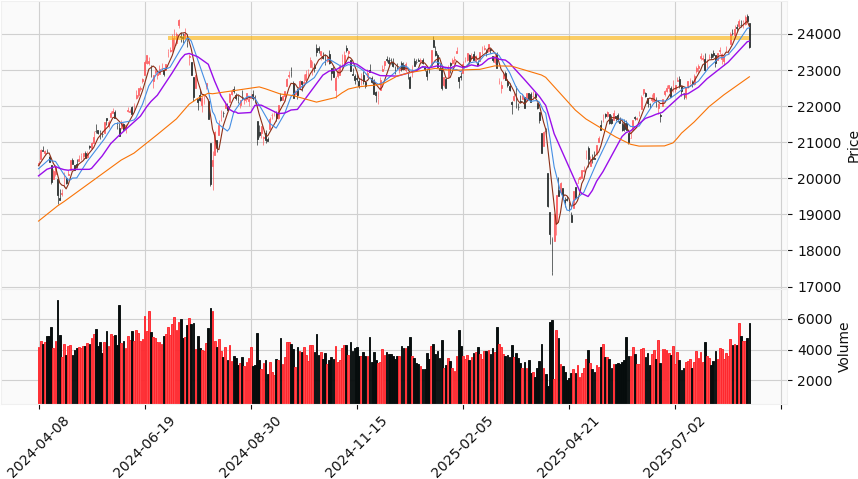

In [8]:
# 盤後：支撐線繪製
image = mysys.DrawOnKlineChart('TAIEX','2024-04-08','2025-08-20',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股解盤  

* 飛宏(2457)  
  看法：跌破頸線與20日線支撐，底型突破**失敗**。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'2457')

> **盤後**：底部反轉交易策略分析   

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-05-27'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-06-05']['High']

    # 設定底部到頸線差距
    bottom_date  = '2025-07-09'
    bottom_price = range_prices.loc['2025-07-09']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-08-11'

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('2457','2025-05-07','2025-08-20',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-950)：外資小賣(-885)、投信中立(0)、自營小賣(-65)。  
主力小賣(-363)。  
分公司買賣家數差分散(-132)。  
融資減(-103)、融券減(-33)。  

* 群創(3481)  
  看法：回測頸線支撐有守。       

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'3481')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-05-29'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-06-05']['High']

    # 設定底部到頸線差距
    bottom_date  = '2025-07-22'
    bottom_price = range_prices.loc['2025-07-22']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-08-13'

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('3481','2025-05-15','2025-08-20',line_drawing_callback)
display(image)

籌碼面：  
法人小買(+18012)：外資小買(+15733)、投信中立(0)、自營小買(+2239)。  
主力小買(+7634)。  
分公司買賣家數差集中(+25)。  
融資減(-2212)、融券中立(-25)。  